<a href="https://colab.research.google.com/github/Swapnil-417/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Customer Segmentation for Online Retail store. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing online retail dataset
file_path = "/content/drive/MyDrive/Capstone Projects/Online Retail Customer Segmentation/data/"
data = pd.read_excel(file_path + "Online Retail.xlsx")

In [190]:
raw_data = data.copy()

# **Data Exploration**

In [191]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [192]:
raw_data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [193]:
raw_data.shape

(541909, 8)

In [194]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## **Data Inspection**

In [195]:
# checking duplicate values
raw_data.duplicated().sum()

5268

In [196]:
raw_data[raw_data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [197]:
# droping duplicate values
raw_data = raw_data.drop_duplicates()

In [198]:
raw_data.duplicated().sum()

0

In [199]:
# checking mising values
raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

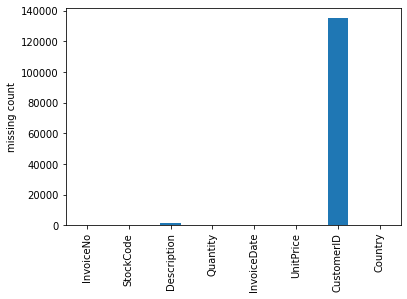

In [200]:
raw_data.isnull().sum().plot.bar()
plt.ylabel('missing count');

In [201]:
# looking at the missing values
raw_data[raw_data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [202]:
# checking null values %
raw_data['CustomerID'].isnull().sum()*100/len(raw_data)

25.16337737891812

imputing missing CustomerID is not possible and our main task is of customer segmentation so we will drop missing CustomerID values which are around 25%.

In [203]:
# droping missing values
raw_data = raw_data.dropna(subset=['CustomerID'],axis=0)
raw_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [204]:
raw_data.shape

(401604, 8)

In [205]:
raw_data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


We can see minimum value for Quantity is negative so we will explore the quantity column

# **Exploratory Data Analysis**

### **Exploring Quantity column**

In [206]:
raw_data['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

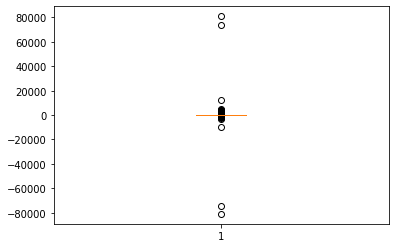

In [207]:
plt.boxplot(raw_data['Quantity']);

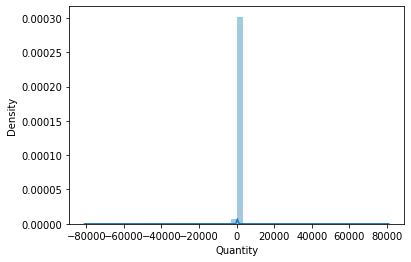

In [208]:
sns.distplot(raw_data['Quantity']);

In [209]:
raw_data[raw_data['Quantity'] == -80995]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


This type of transactions are of cancelled orders and we saw in description this transactions have C at starting of InvoiceNo. We will see more out of it

In [210]:
raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [211]:
cancelled_df= raw_data[raw_data['InvoiceNo'].astype(str).str.contains('C')]

In [212]:
cancelled_df[cancelled_df['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


We can see Quantity is less than 0 for all InvoiceNo starting with C as we expected this are the cancelled orders

In [213]:
cancelled_df.shape

(8872, 8)

**There are 8872 cancelled orders which are huge**

### **What is the average quantity customers purchase per order?**

In [214]:
# extract the date from datetime
def extract_date(datetime_obj):
  return datetime_obj.date()

In [215]:
raw_data['date'] = raw_data['InvoiceDate'].apply(extract_date)

In [216]:
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [217]:
qtywise_ctr= raw_data.groupby(['CustomerID','date'])['Quantity'].sum().reset_index()
qtywise_ctr.sort_values(by='Quantity', ascending=False).head()

,CustomerID,date,Quantity
16609,17450.0,2011-09-20,25930
7948,14646.0,2011-10-20,18140
181,12415.0,2011-06-15,15241
14210,16684.0,2011-10-05,14808
7937,14646.0,2011-08-11,14730


These are the top customers who purchased maximum quantity on a single day.

In [218]:
qtywise_ctr['Quantity'].describe()

count    19296.000000
mean       253.568149
std        623.090066
min      -9360.000000
25%         52.000000
50%        140.000000
75%        276.250000
max      25930.000000
Name: Quantity, dtype: float64

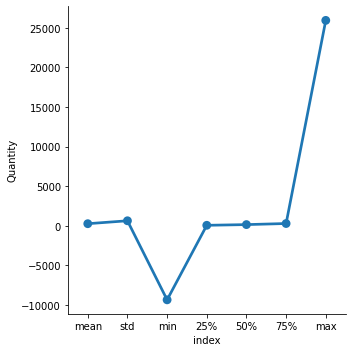

In [219]:
describe_qnty_df = qtywise_ctr.describe()
describe_qnty_df.reset_index(inplace=True)
describe_qnty_df = describe_qnty_df[describe_qnty_df['index'] != 'count']
sns.factorplot(x='index', y='Quantity', data=describe_qnty_df)
plt.show()

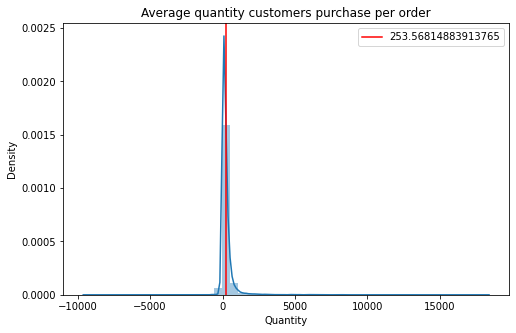

In [220]:
# Distribution of quantity purchased by customer per order
data3= qtywise_ctr[qtywise_ctr['Quantity']<25930.0]
plt.figure(figsize=(8,5))
sns.distplot(data3['Quantity'])
plt.xlabel("Quantity")
xmean=qtywise_ctr['Quantity'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average quantity customers purchase per order");

### **What is the average number of orders per customer?**

In [221]:
# average quantity
avg_qnty= qtywise_ctr.groupby(['CustomerID'],as_index=False).agg({'Quantity':'mean'})
orders_df= qtywise_ctr['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID', 'CustomerID':'orders'}).sort_values(by='CustomerID')
avg_qnty= avg_qnty.merge(orders_df)
avg_qnty.head()

,CustomerID,Quantity,orders
0,12346.0,0.000000,1
1,12347.0,351.142857,7
2,12348.0,585.250000,4
3,12349.0,631.000000,1
4,12350.0,197.000000,1


We are looking at the average quantity purchased by the customers but we can see there are some single orders and average quantity alos showing 0. So, we will filter them by above 5 orders and then we will see average quantity top customers.

In [222]:
avg_qnty['orders'].describe()

count    4372.000000
mean        4.413541
std         6.674343
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       146.000000
Name: orders, dtype: float64

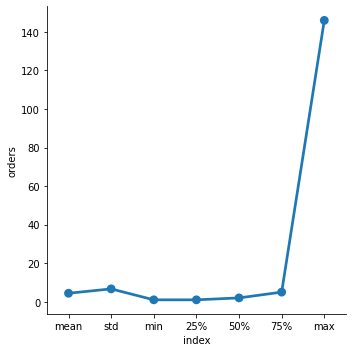

In [223]:
describe_orders_df = avg_qnty.describe()
describe_orders_df.reset_index(inplace=True)
describe_orders_df = describe_orders_df[describe_orders_df['index'] != 'count']
sns.factorplot(x='index', y='orders', data=describe_orders_df)
plt.show()

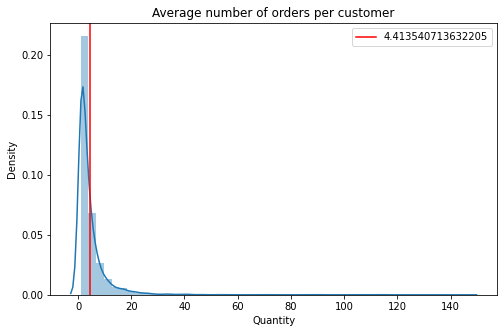

In [224]:
# Average number of orders per customer
plt.figure(figsize=(8,5))
sns.distplot(avg_qnty['orders'])
plt.xlabel("Quantity")
xmean=avg_qnty['orders'].mean()
plt.axvline(x=xmean, color='red', label= xmean)
plt.legend()
plt.title("Average number of orders per customer");

### **Top customers buying maximum quantity**

In [225]:
filtered_avg_qnty = avg_qnty[(avg_qnty['orders']>=5) & (avg_qnty['Quantity']>0)]
filtered_avg_qnty.head()

,CustomerID,Quantity,orders
1,12347.0,351.142857,7
5,12352.0,67.142857,7
12,12359.0,266.500000,6
15,12362.0,170.153846,13
29,12380.0,225.200000,5


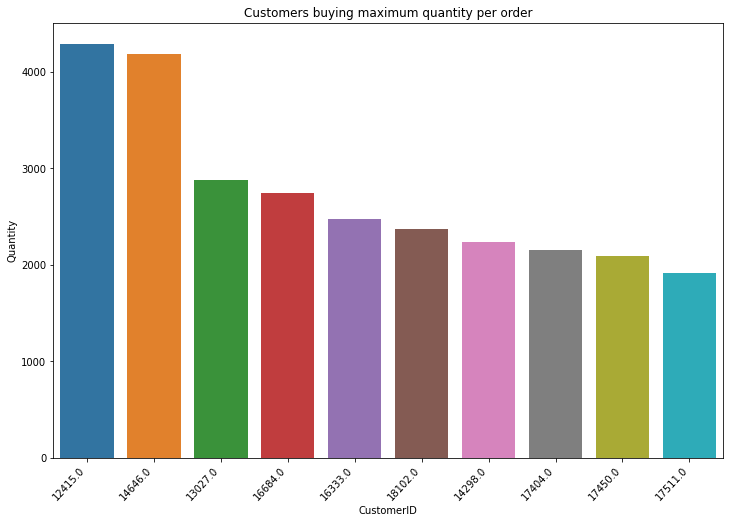

In [226]:
# Customers buying maximum quantity on average per order
data1= filtered_avg_qnty.sort_values(by='Quantity',ascending=False).head(10)

# plot
fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='Quantity', data= data1, order=data1['CustomerID'])
ax.set_title('Customers buying maximum quantity per order')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**These are the customers buying maximum quantity on average per order**

### **Top customers with highest number of orders**

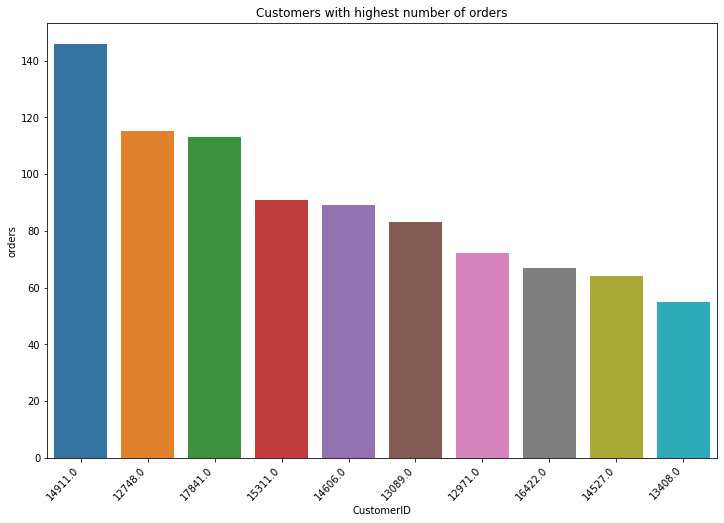

In [227]:
# Customers with highest number of orders
data2= filtered_avg_qnty.sort_values(by='orders',ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12,8))
ax=sns.barplot(x='CustomerID', y='orders', data= data2, order=data2['CustomerID'])
ax.set_title('Customers with highest number of orders')
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

### **Exploring Country column**

In [228]:
country_cnt = raw_data['Country'].value_counts()
len(country_cnt)

37

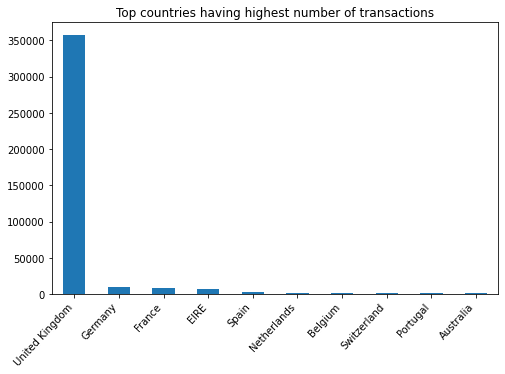

In [229]:
# top countries having highest number of transactions
plt.figure(figsize=(8,5))
country_cnt.head(10).plot.bar()
plt.title('Top countries having highest number of transactions');
plt.xticks(rotation=47, ha="right")
plt.show()

Top 5 countries having highest number of transactions are:


1.   United Kingdom
2.   Germany
3.   France
4.   EIRE
5.   Spain



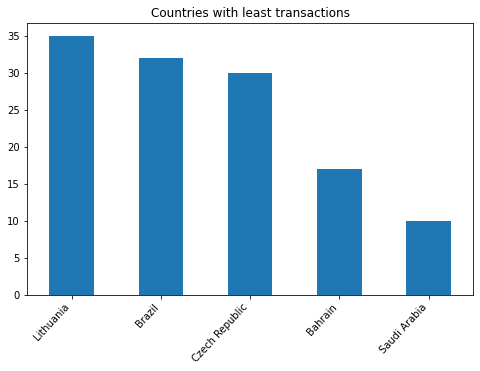

In [230]:
# countries with least transactions
plt.figure(figsize=(8,5))
country_cnt.tail().plot.bar()
plt.title('Countries with least transactions')
plt.xticks(rotation=47, ha="right")
plt.show()

Countries with least transactions:
1. Lithuania
2. Brazil
3. Czech Republic
4. Bahrain
5. Saudi Arabia

In [231]:
# checking transaction % in UK
tr_uk = round(len(raw_data[raw_data['Country']=='United Kingdom']) / len(raw_data) * 100,2)
print(f"{tr_uk}% transactions are from United Kingdom.")

88.83% transactions are from United Kingdom.


### **Which Country has most customers?**

In [232]:
cmr_cty_df= raw_data.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
cmr_cty_df= cmr_cty_df.reset_index().rename(columns={'CustomerID':'Number_of_Customers'})
cmr_cty_df.head()

,Country,Number_of_Customers
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25


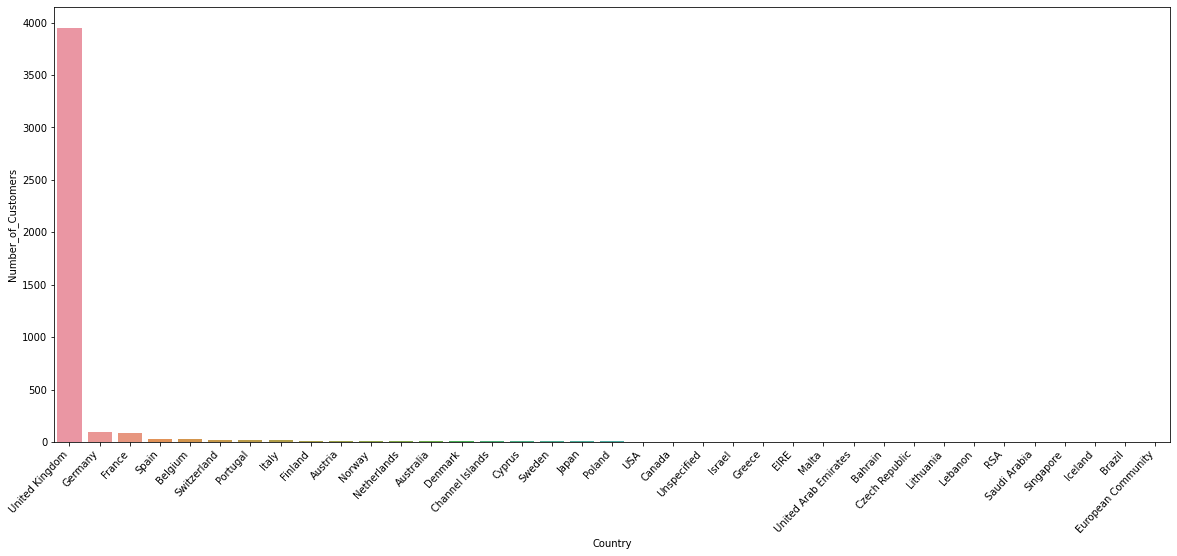

In [233]:
fig, ax = plt.subplots(figsize=(20,8))
ax=sns.barplot(x='Country', y='Number_of_Customers',data=cmr_cty_df,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

**Not only maximum transactions come from UK but also most customers are located in United Kingdom.**

# **Data Preprocessing**

**We will consider only United Kingdom retail data for maximum impact and not to form clustering on geographical conditions.**

In [234]:
# filtering only United Kingdom customers data
ukretail_df= raw_data[raw_data['Country'] == 'United Kingdom']

**We saw before there were cancelled orders present in the dataset.So, filtering cancelled orders also.**

In [235]:
# filtering cancelled orders
ukretail_df= ukretail_df[ukretail_df['Quantity']>0]

**Creating total cost column**

In [236]:
# total cost
ukretail_df['total_cost'] = ukretail_df["Quantity"] * ukretail_df["UnitPrice"]

In [237]:
# checking dates
print(f"first date: {ukretail_df['date'].min()}")
print(f"latest date: {ukretail_df['date'].max()}")

first date: 2010-12-01
latest date: 2011-12-09


In [238]:
ukretail_df.shape

(349227, 10)

In [239]:
ukretail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


# **RFM Analysis**

## **Recency**
To calculate recency, We will fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we will calculate the days difference between the most recent transaction carried out by the customer and this reference date.

Setting reference date as 2011-12-10 as last date of transaction in our dataset is 2011-12-09

In [240]:
# setting reference date as 2011-12-10
ref_date= dt.date(2011,12,10)

In [241]:
# checking recent purchase date
recency_df = ukretail_df.groupby("CustomerID")['date'].max().reset_index()
recency_df = recency_df.rename(columns={'date':'recent_purchase'})
recency_df.head()

,CustomerID,recent_purchase
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06


we can see this are the last date of purchase of the customers

In [242]:
# calculate recency
recency_df['Recency'] = recency_df['recent_purchase'].apply(lambda x: (ref_date - x).days)

In [243]:
recency_df.head()

,CustomerID,recent_purchase,Recency
0,12346.0,2011-01-18,326
1,12747.0,2011-12-07,3
2,12748.0,2011-12-09,1
3,12749.0,2011-12-06,4
4,12820.0,2011-12-06,4


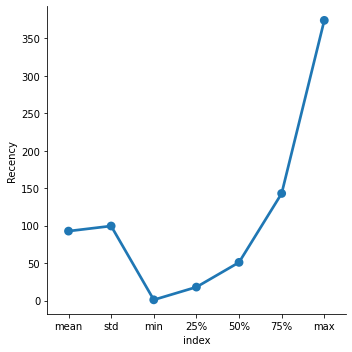

In [244]:
# Descriptive Statistics of Recency
describe_recency = recency_df.describe()
describe_recency.reset_index(inplace=True)
describe_recency = describe_recency[describe_recency['index'] != 'count']
sns.factorplot(x='index', y='Recency', data=describe_recency)
plt.show()

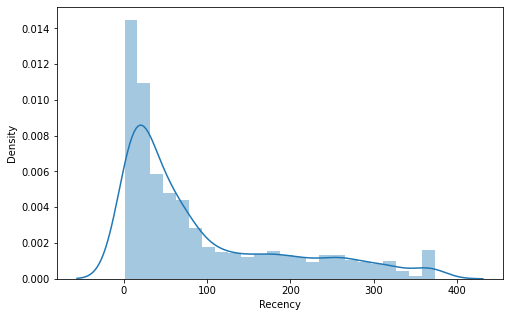

In [245]:
plt.figure(figsize=(8,5))
sns.distplot(recency_df['Recency']);

We can see that there are more customers who have purchased recently and the graph decrease furthur.

## **Frequency**

Frequency will helps us to know how many times a customer has purchased.

In [246]:
frequency_df = ukretail_df.groupby('CustomerID').agg({'InvoiceNo': 'count'}).reset_index()
frequency_df.rename(columns={'InvoiceNo': 'Frequency'}, inplace= True)
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4413
3,12749.0,199
4,12820.0,59


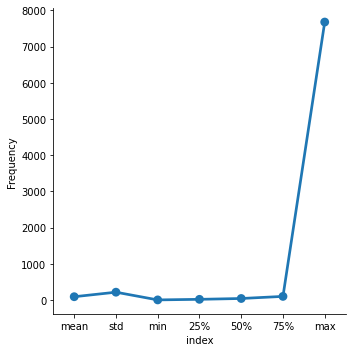

In [247]:
# Descriptive Statistics of frequency
describe_frequency = frequency_df.describe()
describe_frequency.reset_index(inplace=True)
describe_frequency = describe_frequency[describe_frequency['index'] != 'count']
sns.factorplot(x='index', y='Frequency', data=describe_frequency)
plt.show()

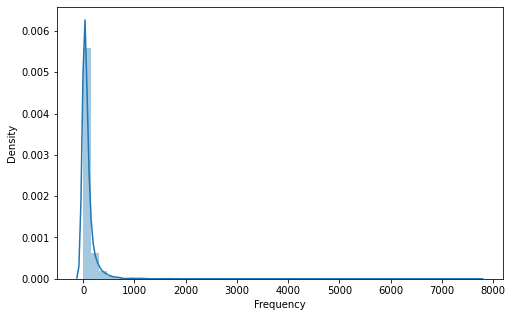

In [248]:
plt.figure(figsize=(8,5))
sns.distplot(frequency_df['Frequency']);

## **Monetary**

In [249]:
monetary_df = ukretail_df.groupby('CustomerID').agg({'total_cost': 'sum'}).reset_index()
monetary_df.rename(columns={'total_cost': 'Monetary'}, inplace= True)
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33053.19
3,12749.0,4090.88
4,12820.0,942.34


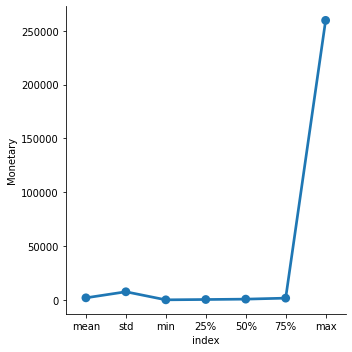

In [250]:
# Descriptive Statistics of monetary
describe_monetary = monetary_df.describe()
describe_monetary.reset_index(inplace=True)
describe_monetary = describe_monetary[describe_monetary['index'] != 'count']
sns.factorplot(x='index', y='Monetary', data=describe_monetary)
plt.show()

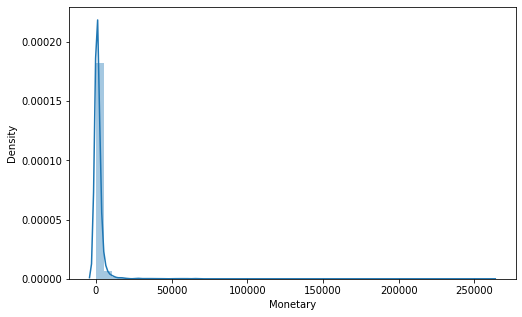

In [251]:
plt.figure(figsize=(8,5))
sns.distplot(monetary_df['Monetary']);

### **Combining Recency, Frequency and Monetary**

In [252]:
# combining Recency, Frequency and Monetary
rfm_df= recency_df.merge(frequency_df, how="outer")
rfm_df= rfm_df.merge(monetary_df, how="outer")
rfm_df.drop("recent_purchase", axis=1, inplace=True)

In [253]:
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4413,33053.19
3,12749.0,4,199,4090.88
4,12820.0,4,59,942.34
5,12821.0,215,6,92.72
6,12822.0,71,46,948.88
7,12823.0,75,5,1759.50
8,12824.0,60,25,397.12
9,12826.0,3,91,1474.72
